In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.set_palette('pastel')

# 전라북도 방문자 수 추이

In [122]:
visit = pd.read_csv('/Users/jeongseung-a/Desktop/데분프 플젝/전라북도/전라북도_방문자 수.csv',encoding='cp949')

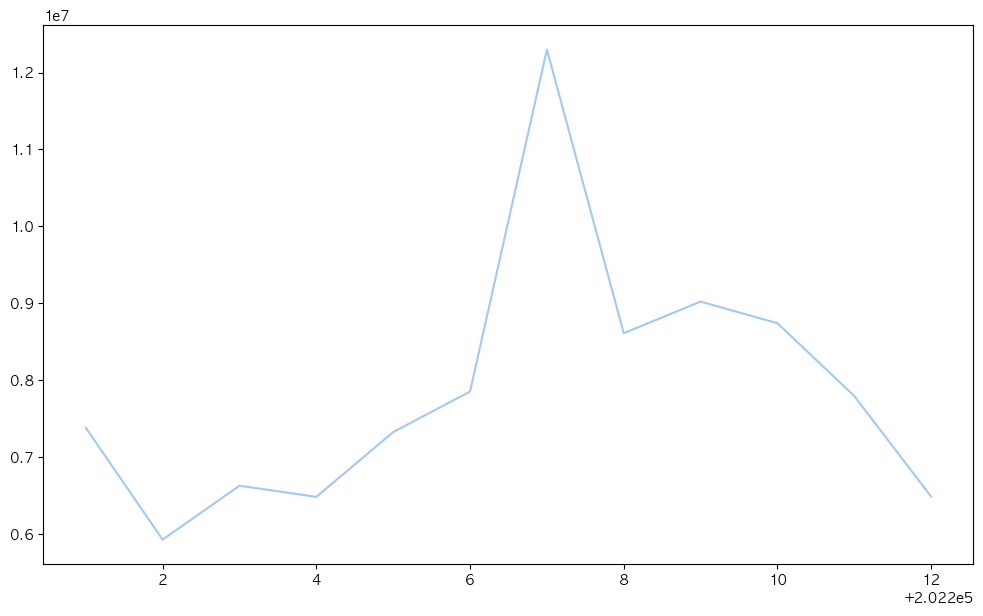

In [123]:
plt.plot(visit['기준연월'], visit['방문자 수'])

# 인기관광지(네비게이션 데이터 검색건수)

In [124]:
outsider = pd.read_csv('/Users/jeongseung-a/Desktop/데분프 플젝/전라북도/인기관광지_외지인.csv',encoding='cp949')

In [125]:
#외지인 검색 수
outsider.head()

,순위,관광지명,주소,분류,외지인 검색 수
0,1,전주한옥마을,전북 전주시 완산구 기린대로 99-0,역사유적지,319361
1,2,익산역,전북 익산시 익산대로 153-0,교통시설,133974
2,3,전주월드컵경기장,전북 전주시 덕진구 기린대로 1055-0,레저스포츠시설,99702
3,4,롯데몰군산점,전북 군산시 조촌로 130-0,쇼핑몰,98944
4,5,선유도해수욕장,전북 군산시 선유도1길 235-0,자연경관(하천/해양),89600


In [126]:
#전체 검색 수
al = pd.read_csv('/Users/jeongseung-a/Desktop/데분프 플젝/전라북도/인기관광지_전체.csv',encoding='cp949')
al.head()

,순위,관광지명,주소,분류,Unnamed: 4
0,1,전주한옥마을,전북 전주시 완산구 기린대로 99-0,역사유적지,349953
1,2,익산역,전북 익산시 익산대로 153-0,교통시설,209214
2,3,롯데몰군산점,전북 군산시 조촌로 130-0,쇼핑몰,155882
3,4,전주월드컵경기장,전북 전주시 덕진구 기린대로 1055-0,레저스포츠시설,155872
4,5,선유도해수욕장,전북 군산시 선유도1길 235-0,자연경관(하천/해양),102759


# -기초지자체

In [127]:
#기초지자체 검색 건수
sch = pd.read_csv('/Users/jeongseung-a/Desktop/데분프 플젝/전라북도/전라북도_지역별 검색건수.csv',encoding='cp949')

In [128]:
c = sch.sort_values(by="기초지자체 검색건수",ascending = False ,inplace = False)
c.head()

,기초지자체,티맵카테고리중분류명,기초지자체 검색건수,기초지자체 검색건수 비율,중분류 검색건수,중분류 검색건수 비율
109,전주시 완산구,레저스포츠,2795930,20.2,8309,0.3
116,전주시 완산구,체험관광,2795930,20.2,847,0.0
115,전주시 완산구,자연관광,2795930,20.2,85,0.0
114,전주시 완산구,음식,2795930,20.2,1391818,49.8
113,전주시 완산구,역사관광,2795930,20.2,407571,14.6


In [129]:
#기초지자체(시/군/구) 검색건수
spot = pd.read_excel('/Users/jeongseung-a/Desktop/데분프 플젝/전라북도/관광지 검색순위.xlsx')
jbs = spot.groupby(['시/군/구'])[['검색건수']].count()
jbs.reset_index(drop=False, inplace=True)
jbs.sort_values(by="검색건수",ascending = False ,inplace = False)

,시/군/구,검색건수
1,군산시,72
5,부안군,50
8,익산시,46
12,전주시 완산구,46
7,완주군,36
3,남원시,34
11,전주시 덕진구,34
4,무주군,31
0,고창군,29
2,김제시,25


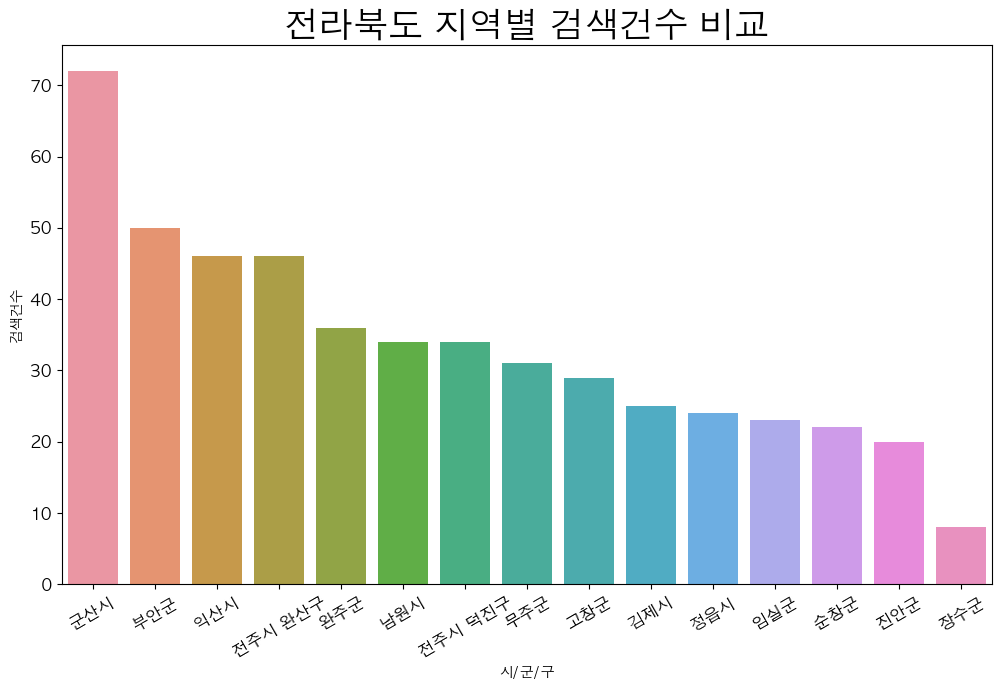

In [130]:
jbs.sort_values(by='검색건수', ascending=False, inplace=True)
rcParams['figure.figsize'] = 12,7
sns.barplot(data = jbs,
           x=jbs['시/군/구'],
           y=jbs['검색건수']);
plt.title('전라북도 지역별 검색건수 비교', size=25)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

# -중분류

In [131]:
#중분류 검색건수
a = sch.sort_values(by="중분류 검색건수",ascending = False ,inplace = False)
a.head()

,기초지자체,티맵카테고리중분류명,기초지자체 검색건수,기초지자체 검색건수 비율,중분류 검색건수,중분류 검색건수 비율
114,전주시 완산구,음식,2795930,20.2,1391818,49.8
15,군산시,음식,2687491,19.4,1153923,42.9
105,전주시 덕진구,음식,1713211,12.4,779043,45.5
78,익산시,음식,1277392,9.2,510103,39.9
12,군산시,쇼핑,2687491,19.4,425360,15.8


In [132]:
jb_middle = spot.groupby(['중분류 카테고리'])[['검색건수']].count()
jb_middle.reset_index(drop=False, inplace=True)

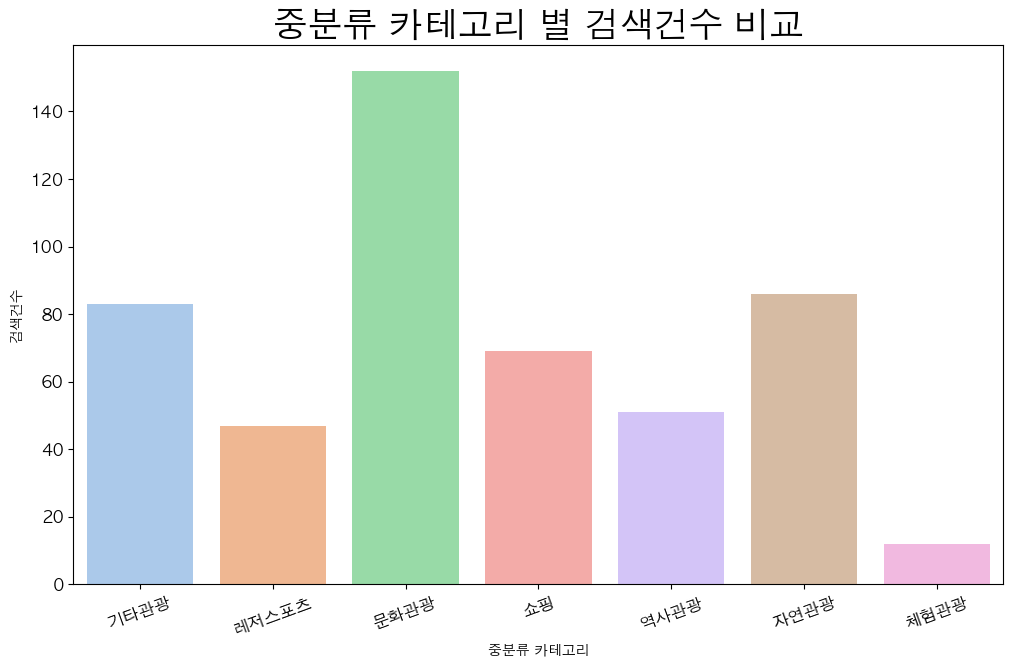

In [133]:
rcParams['figure.figsize'] = 12,7
sns.barplot(data = jb_middle,
           x=jb_middle['중분류 카테고리'],
           y=jb_middle['검색건수']);
plt.title('중분류 카테고리 별 검색건수 비교', size=25)
plt.xticks(rotation=20,size=12)
plt.yticks(size=12)
plt.show()

!!!!!!!!!!!!!!음식이 문화관광에 속하나?

In [134]:
type_sch= pd.read_csv('/Users/jeongseung-a/Desktop/데분프 플젝/전라북도/전라북도_유형별 검색건수.csv',encoding='cp949')

In [135]:
#유형별 검색건수
b = type_sch.sort_values(by="유형별 검색건수",ascending = False ,inplace = False)
b.head()

,티맵카테고리중분류명,티맵카테고리중분류명.1,유형별 검색건수,유형별 검색건수 비율
32,음식,한식,2465846,17.8
33,음식,카페/찻집,1042188,7.5
31,음식,전문음식,729187,5.3
42,기타관광,교통시설,661448,4.8
36,숙박,호텔,654029,4.7


In [137]:
grp=type_sch.groupby('티맵카테고리중분류명')
grp

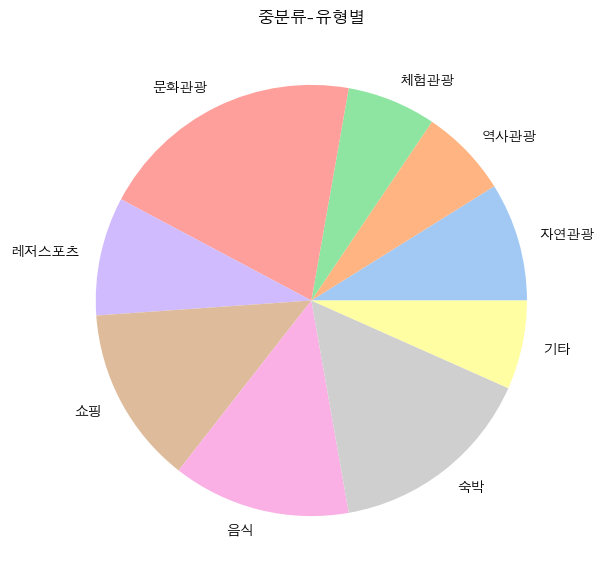

In [139]:
values = [grp.size()['자연관광'], grp.size()['역사관광'],grp.size()['체험관광'],grp.size()['문화관광'],grp.size()['레저스포츠'],grp.size()['쇼핑'],grp.size()['음식'],grp.size()['숙박'],grp.size()['기타관광']]
labels = ['자연관광', '역사관광','체험관광','문화관광','레저스포츠','쇼핑','음식','숙박','기타']

plt.pie(values, labels=labels)
plt.title('중분류-유형별')
plt.show()

In [136]:
#외국인 따로 데이터 있음... 회의 후 나중에 추가